In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv('/content/car data.csv')
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


In [ ]:
df.shape

(301, 9)

In [ ]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


Data Preprocessing

In [ ]:
#Drop the Car_Name column (not useful for modeling)
df.drop(columns=['Car_Name'], inplace=True)

# Create a new feature for car age before dropping the 'Year' column
df['Car_Age'] = 2024 - df['Year']

# Now you can safely drop the 'Year' column
df.drop(columns=['Year'], inplace=True)
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,8
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,9
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,15
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,7


One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,8,True,False,False,True
297,4.00,5.90,60000,0,9,False,True,False,True
298,3.35,11.00,87934,0,15,False,True,False,True
299,11.50,12.50,9000,0,7,True,False,False,True


In [ ]:
# Scale numerical features
scaler = StandardScaler()
numeric_cols = ['Present_Price', 'Kms_Driven', 'Car_Age']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
df

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.236215,-0.256224,0,-0.128897,False,True,False,True
1,4.75,0.221505,0.155911,0,0.217514,True,False,False,True
2,7.25,0.257427,-0.773969,0,-1.168129,False,True,False,True
3,2.85,-0.403079,-0.817758,0,0.910335,False,True,False,True
4,4.60,-0.087890,0.141743,0,-0.128897,True,False,False,True
...,...,...,...,...,...,...,...,...,...
296,9.50,0.460214,-0.076225,0,-0.821718,True,False,False,True
297,4.00,-0.200292,0.593804,0,-0.475308,False,True,False,True
298,3.35,0.390687,1.313340,0,1.603156,False,True,False,True
299,11.50,0.564504,-0.719876,0,-1.168129,True,False,False,True


In [ ]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,-0.236215,-0.256224,0,-0.128897,False,True,False,True
1,4.75,0.221505,0.155911,0,0.217514,True,False,False,True
2,7.25,0.257427,-0.773969,0,-1.168129,False,True,False,True
3,2.85,-0.403079,-0.817758,0,0.910335,False,True,False,True
4,4.60,-0.087890,0.141743,0,-0.128897,True,False,False,True


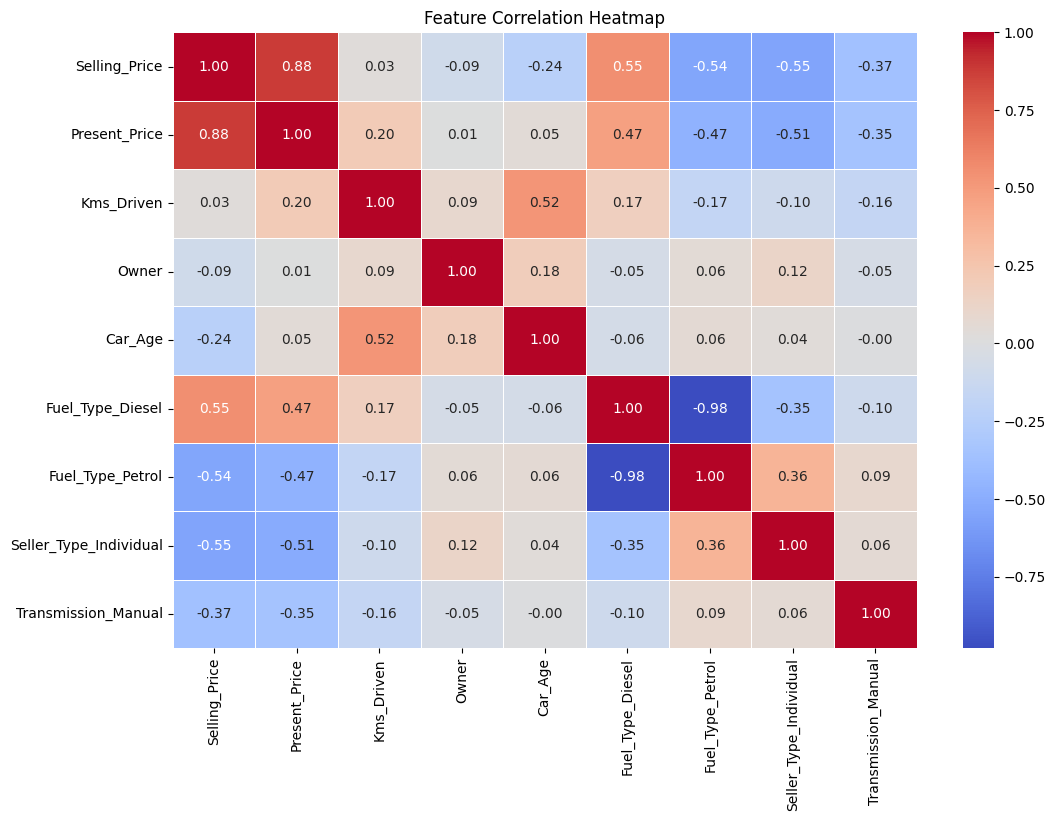

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

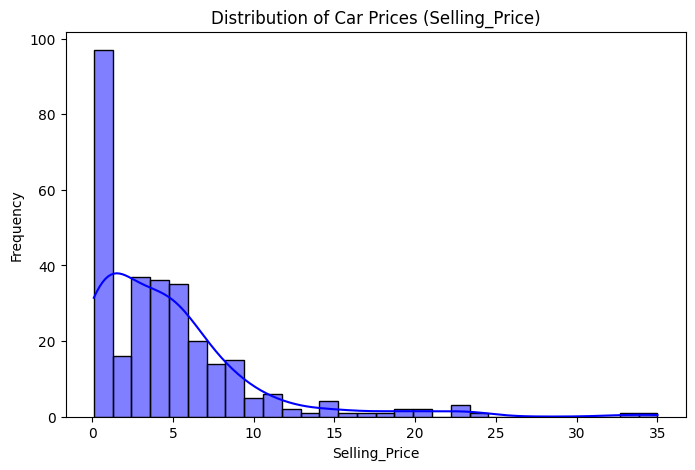

In [ ]:
#Distribution of target variable(Selling_Price)
plt.figure(figsize=(8, 5))
sns.histplot(df['Selling_Price'], bins=30, kde=True, color='blue')
plt.title("Distribution of Car Prices (Selling_Price)")
plt.xlabel("Selling_Price")
plt.ylabel("Frequency")
plt.show()

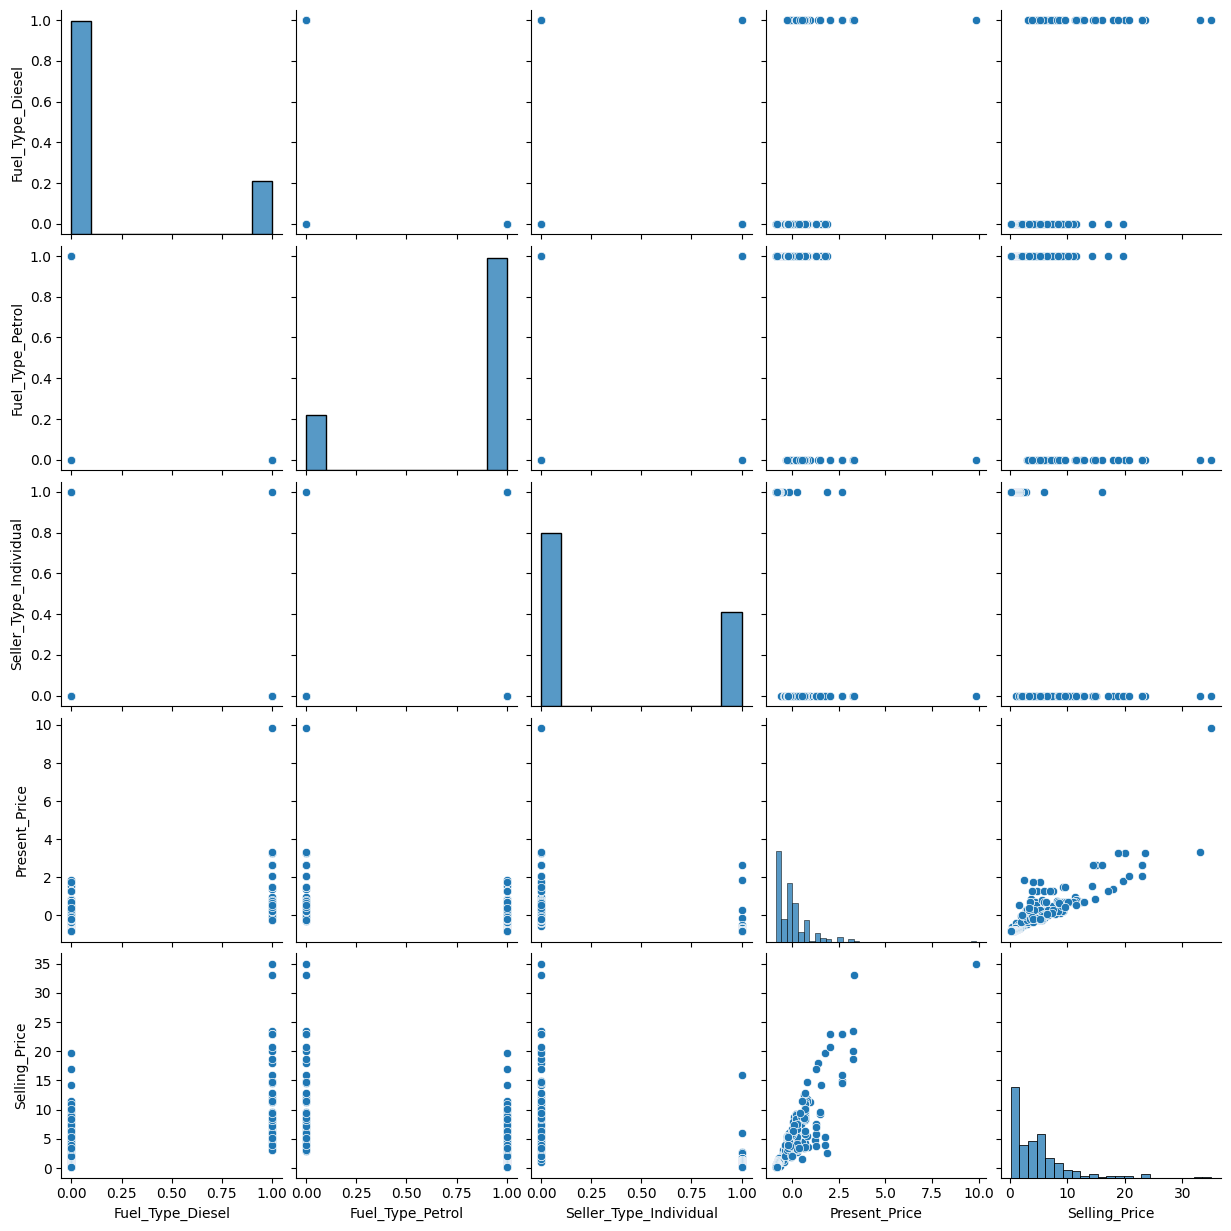

In [ ]:
sns.pairplot(df[['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Present_Price', 'Selling_Price']])
plt.show()

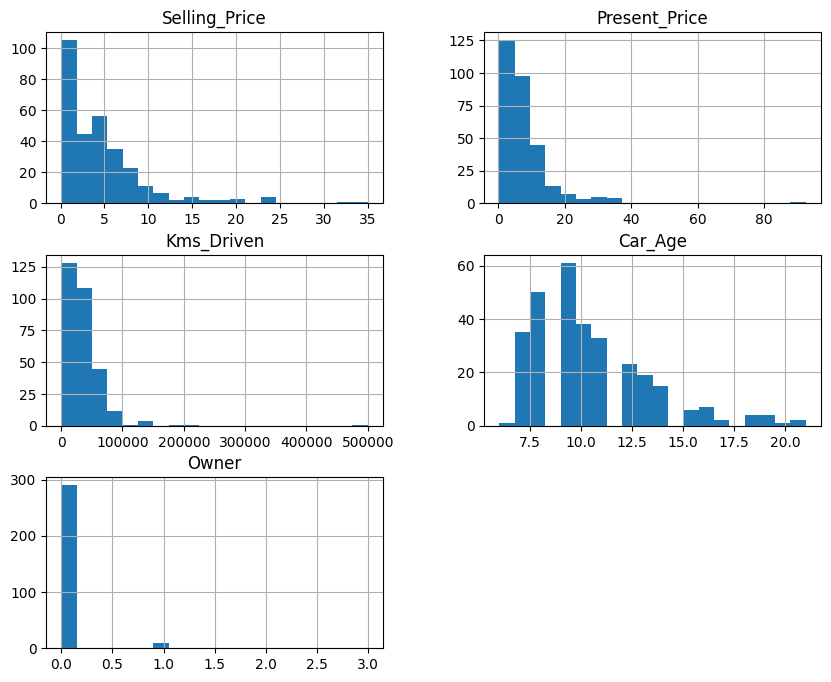

<ipython-input-43-1daa42e8f32e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


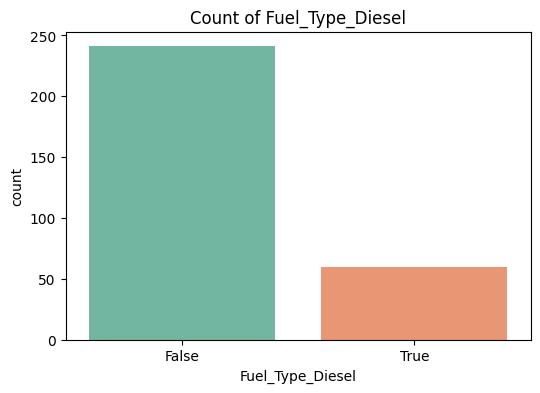

<ipython-input-43-1daa42e8f32e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


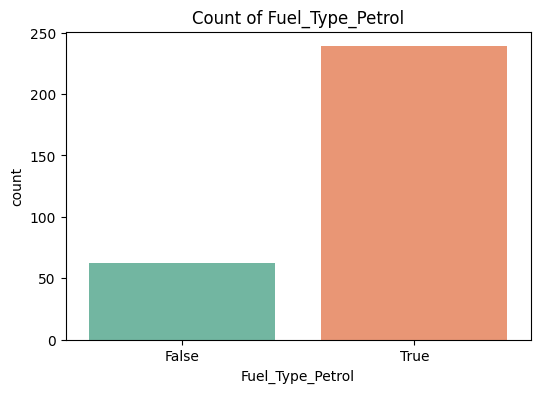

<ipython-input-43-1daa42e8f32e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


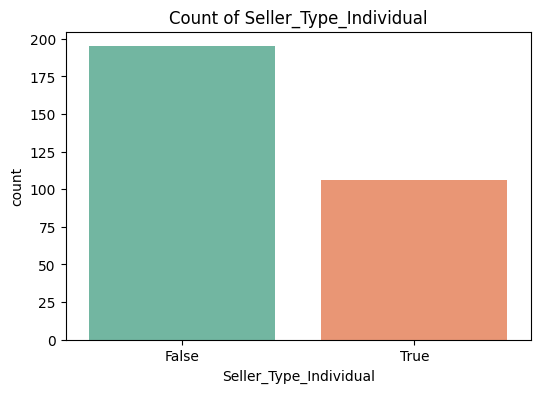

<ipython-input-43-1daa42e8f32e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')


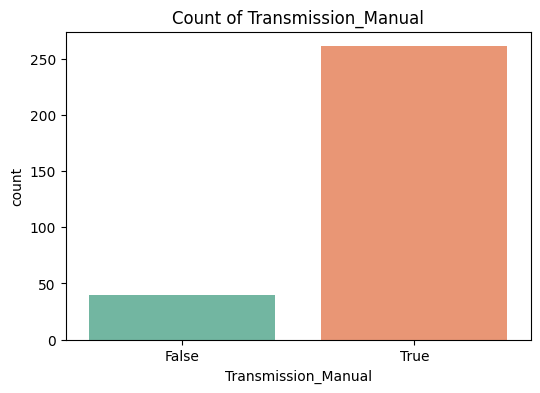

In [ ]:


#Visualizing the distribution of numerical features
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age', 'Owner']
df[numerical_cols].hist(figsize=(10, 8), bins=20)
plt.show()


# Count plot for categorical features
#categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission'] # This line is replaced
categorical_cols = ['Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'] # Updated with the new column names after one-hot encoding
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Count of {col}")
    plt.show()





Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop(columns=["Selling_Price"])  # All columns except target
y = df["Selling_Price"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")



R² Score: 0.8490
RMSE: 1.8652


To Check Skweness

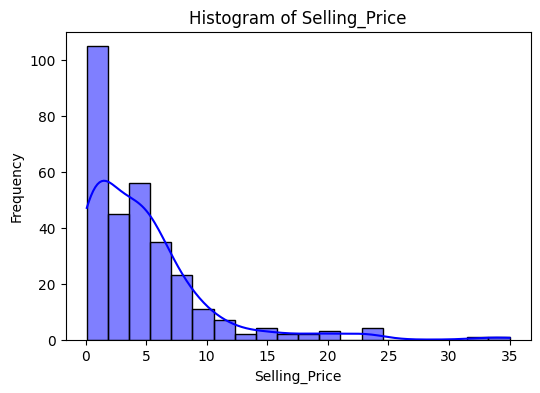

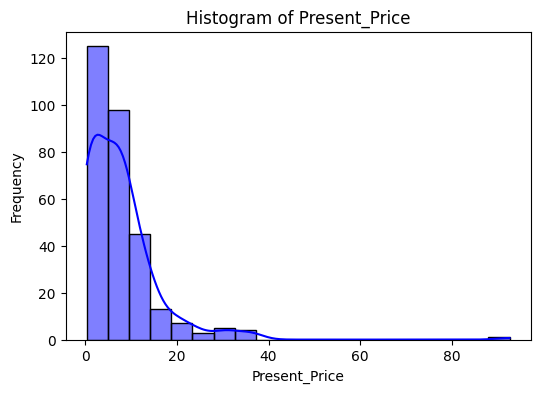

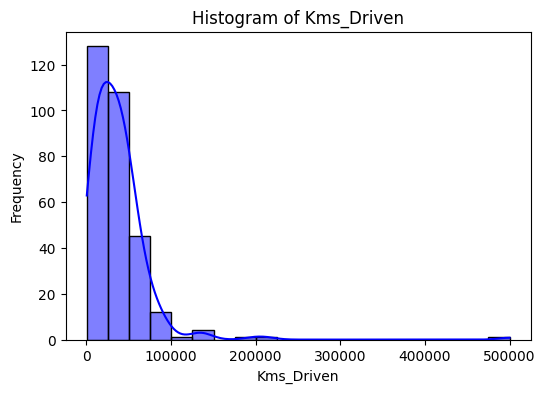

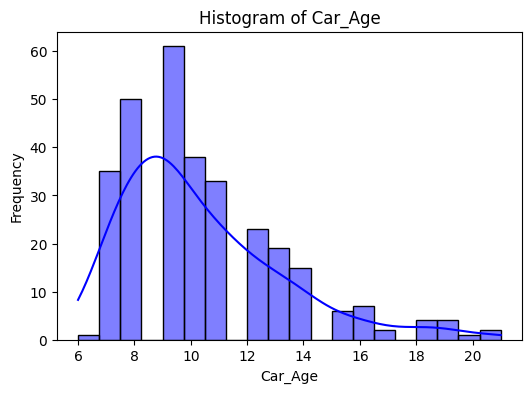

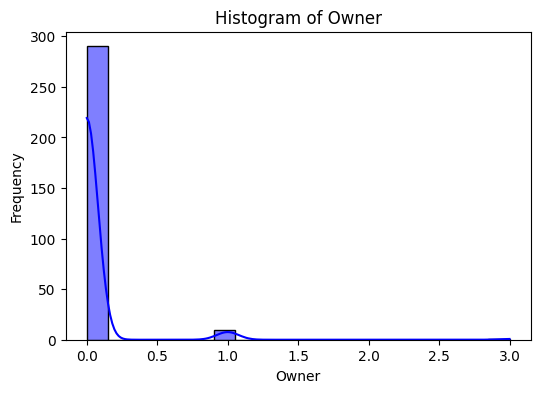

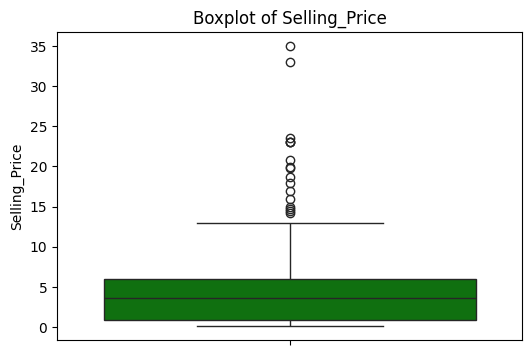

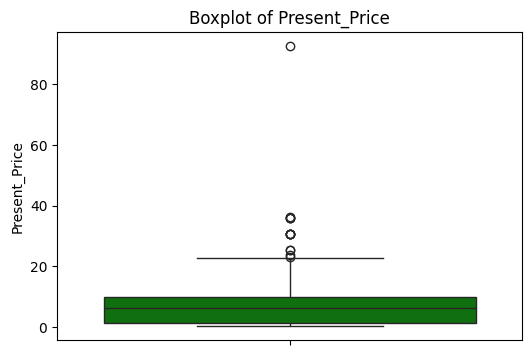

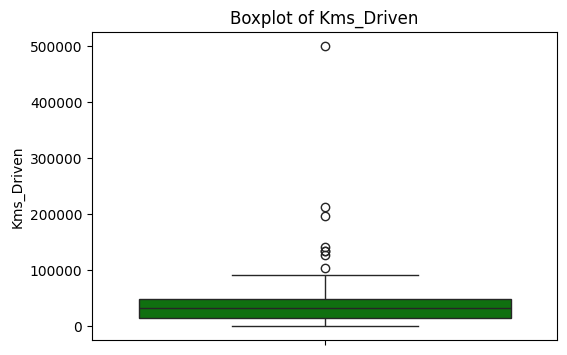

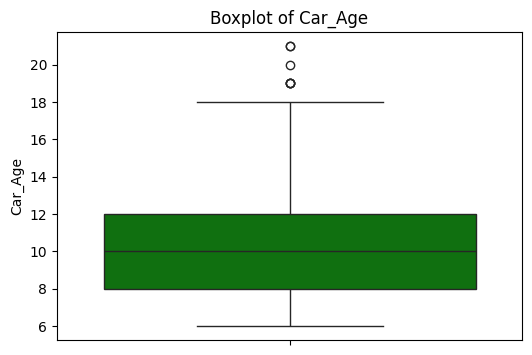

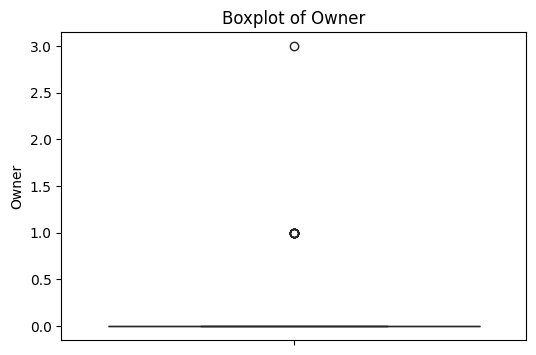

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Load the dataset
file_path = "/content/car data.csv"
df = pd.read_csv(file_path)

df['Car_Age'] = 2024 - df['Year']
df.drop(columns=['Year'], inplace=True)

# Define numerical columns
numerical_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Car_Age', 'Owner']

# Plot histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=20, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Plot boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='green')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [ ]:
# Print skewness values for all numerical columns
skewness = df.skew()
print(skewness)

Selling_Price             2.493422
Present_Price             4.083150
Kms_Driven                6.436013
Owner                     7.616850
Car_Age                   1.246189
Fuel_Type_Diesel          1.512750
Fuel_Type_Petrol         -1.461340
Seller_Type_Individual    0.622146
Transmission_Manual      -2.173776
dtype: float64


In [ ]:
import numpy as np
skewed_cols = df.skew().abs()
highly_skewed = skewed_cols[skewed_cols > 1].index
negatively_skewed = skewed_cols[skewed_cols < 1].index
print("Highly Skewed Columns:\n", highly_skewed)
print("Negativly Skewed Columns:\n", negatively_skewed)
df[highly_skewed] = df[highly_skewed].apply(lambda x: np.log1p(x))
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[negatively_skewed] = pt.fit_transform(df[negatively_skewed])
print(df.skew())

Highly Skewed Columns:
 Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Transmission_Manual'],
      dtype='object')
Negativly Skewed Columns:
 Index(['Seller_Type_Individual'], dtype='object')
Selling_Price             0.115141
Present_Price            -0.047387
Kms_Driven               -1.048906
Owner                     5.738472
Car_Age                   0.658669
Fuel_Type_Diesel          1.512695
Fuel_Type_Petrol         -1.461914
Seller_Type_Individual    0.622146
Transmission_Manual      -2.173828
dtype: float64


In [ ]:
skewed_cols = df.skew().abs()
highly_skewed = skewed_cols[skewed_cols > 1].index
negatively_skewed = skewed_cols[skewed_cols < 1].index
print("Highly Skewed Columns:\n", highly_skewed)
print("Negativly Skewed Columns:\n", negatively_skewed)

Highly Skewed Columns:
 Index(['Kms_Driven', 'Owner', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')
Negativly Skewed Columns:
 Index(['Selling_Price', 'Present_Price', 'Car_Age', 'Seller_Type_Individual'], dtype='object')


Yeo-Johnson Transformation

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
df[negatively_skewed] = pt.fit_transform(df[negatively_skewed])

In [ ]:
print(df.skew())

Selling_Price            -0.082154
Present_Price            -0.118017
Kms_Driven               -1.451070
Owner                     5.294765
Car_Age                   0.050473
Fuel_Type_Diesel          1.512695
Fuel_Type_Petrol         -1.461914
Seller_Type_Individual    0.622146
Transmission_Manual      -2.173828
dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df.drop(columns=["Selling_Price"])  # All columns except target
y = df["Selling_Price"]

# Split the dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

R² Score: 0.9454
RMSE: 0.2263


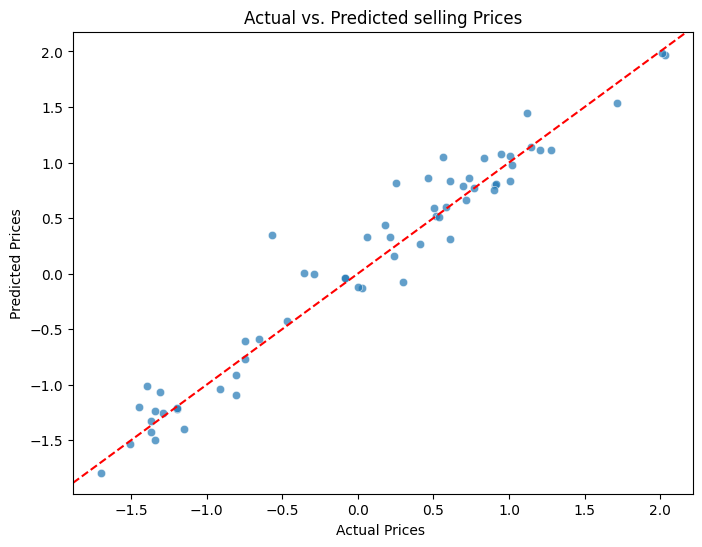

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Prices ")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted selling Prices")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define new features (X) and target (y) using the transformed dataset
X_transformed = df.drop(columns=["Selling_Price"])  # Keep transformed features
y_transformed = df["Selling_Price"]

# Split the transformed dataset (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

# Train Linear Regression Model with transformed features
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5  # Manually taking square root

print(f"📈 New R² Score: {r2:.4f}")
print(f"📉 New RMSE: {rmse:.4f}")


📈 New R² Score: 0.9454
📉 New RMSE: 0.2263


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Apply Polynomial Features (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_transformed)  # Use transformed features

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_transformed, test_size=0.2, random_state=42)

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"🔹 Polynomial R² Score: {r2:.4f}")
print(f"🔹 Polynomial RMSE: {rmse:.4f}")


🔹 Polynomial R² Score: 0.9826
🔹 Polynomial RMSE: 0.1279


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f"🌲 Random Forest R² Score: {r2:.4f}")
print(f"🌲 Random Forest RMSE: {rmse:.4f}")


🌲 Random Forest R² Score: 0.9737
🌲 Random Forest RMSE: 0.1571
